# ÌîÑÎ°úÏ†ùÌä∏: CutMix ÎòêÎäî Mixup ÎπÑÍµêÏã§Ìóò ÌïòÍ∏∞

## ‚úÖ Ïã§ÏäµÎ™©Ìëú

------------------

* AugmentationÏùÑ Î™®Îç∏ ÌïôÏäµÏóê Ï†ÅÏö©ÌïòÍ∏∞
* AugmentationÏùò Ï†ÅÏö©ÏùÑ ÌÜµÌïú ÌïôÏäµ Ìö®Í≥º ÌôïÏù∏ÌïòÍ∏∞
* ÏµúÏã† data augmentation Í∏∞Î≤ï Íµ¨ÌòÑ Î∞è ÌôúÏö©ÌïòÍ∏∞

## ‚úÖ Î™©Ï∞® 

---------------------

**1.** Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞       

**2.** Augmentation Ï†ÅÏö©ÌïòÍ∏∞           

**3.** Cutmix Augmentation           

**4.** Mixup Augmentation       

**5.** Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûë

**6.** Î™®Îç∏ ÎßåÎì§Í∏∞    

**7.** Î™®Îç∏ÌõàÎ†®ÌïòÍ∏∞    

**8.** ÏãúÍ∞ÅÌôî ÌïòÍ∏∞     

**9.** AugmentationÏóê ÏùòÌïú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

## 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
# Î®ºÏ†Ä ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§!
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

***GPU***ÌôòÍ≤ΩÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### [stanford_dogs](https://www.tensorflow.org/datasets/catalog/stanford_dogs)ÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
* 120Í∞ú Í≤¨Ï¢ÖÏùò Ïù¥ÎØ∏ÏßÄÌè¨Ìï®
* Ï¥ù 20,580Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú 12,000Ïû•ÏùÄ ÌïôÏäµÏÖã, ÎÇòÎ®∏ÏßÄ 8,580Ïû•ÏùÄ ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ÏÖã

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

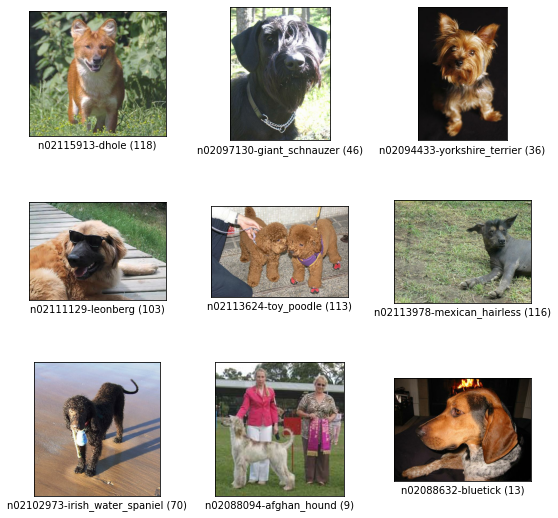

In [4]:
fig = tfds.show_examples(ds_train, ds_info)

## 2. Augmentation Ï†ÅÏö©ÌïòÍ∏∞

--------

ÌÖêÏÑúÌîåÎ°úÏö∞ Random Augmentation API ÏÇ¨Ïö©ÌïòÍ∏∞    

Ïù¥ÎØ∏ÏßÄÏÖãÏóê ÎåÄÌï¥ÏÑú ÎûúÎç§Ìïú ÌôïÎ•†Î°ú Î∞îÎ°ú Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî augmentation Ìï®ÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

* random_brightness()
* random_contrast()
* random_crop()
* random_flip_left_right()
* random_flip_up_down()
* random_hue()
* random_jpeg_quality()
* random_saturation()

In [5]:
# Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò.
# 0~1ÏÇ¨Ïù¥Ïùò float32Î°ú normalizeÌïòÍ≥† (224,224)ÏÇ¨Ïù¥Ï¶àÎ°ú resize
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

In [8]:
def augment(image, label):
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï¢åÏö∞Î°ú Î¨¥ÏûëÏúÑÎ°ú Îí§ÏßëÏäµÎãàÎã§ (ÏôºÏ™ΩÏóêÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú).
    image = tf.image.random_contrast(image, 0.2, 0.5)
    image = tf.image.random_saturation(image, 5, 15)
    image = tf.image.random_hue(image, max_delta=0.2)
    image = tf.image.random_jpeg_quality(image, 75, 95)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [9]:
# Îç∞Ïù¥ÌÑ∞ÏÖã(ds)ÏùÑ Í∞ÄÍ≥µÌïòÎäî Î©îÏù∏Ìï®Ïàò
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ÅÏö©
        num_parallel_calls=2
    )
    # with_aug Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú augmentationÏùò Ï†ÅÏö©Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù Ìï®
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment Ìï®Ïàò Ï†ÅÏö©
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [10]:
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)

In [11]:
num_classes = ds_info.features["label"].num_classes

## 3. Cutmix Augmentation

--------------

Ï°∞Í∏à Îçî Î≥µÏû°Ìïú augmentation Î∞©Î≤ïÏùÑ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

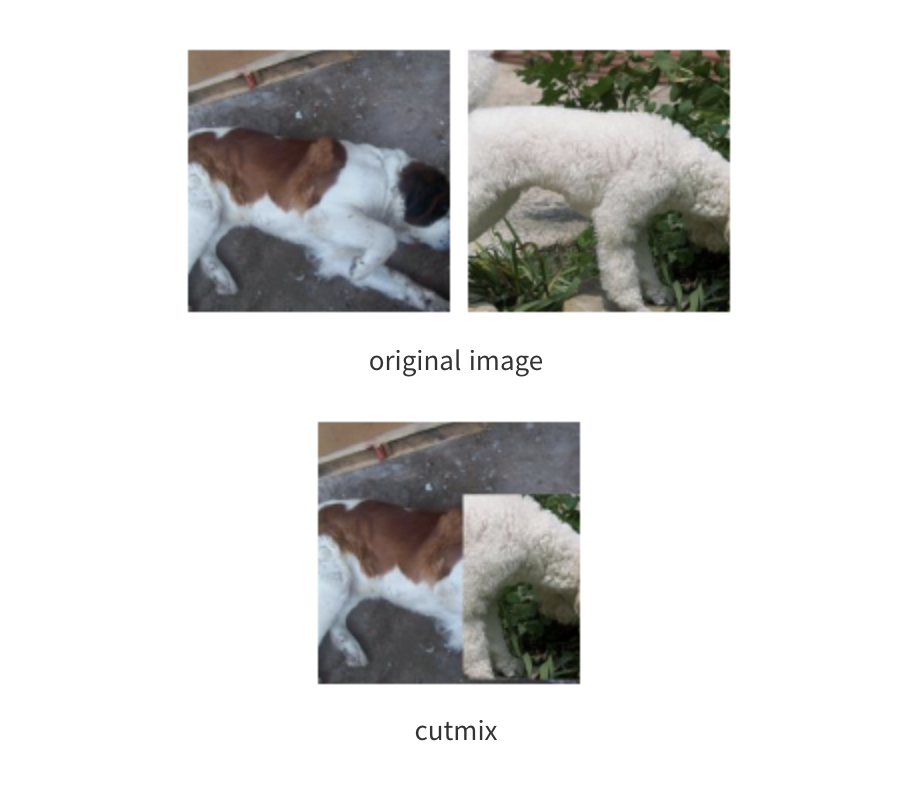

* #### Ïù¥Î¶ÑÏù∏ CutMixÎ•º Î≥¥Í≥† Ïú†Ï∂îÌï† Ïàò ÏûàÎìØ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÏûêÎ•¥Í≥† ÏÑûÎäîÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏäµÎãàÎã§.
* #### CutMixÎäî Î™®Îç∏Ïù¥ Í∞ùÏ≤¥Ïùò Ï∞®Ïù¥Î•º ÏãùÎ≥ÑÌï† Ïàò ÏûàÎäî Î∂ÄÎ∂ÑÏóê ÏßëÏ§ëÌïòÏßÄ ÏïäÍ≥†, Îçú Íµ¨Î≥ÑÎêòÎäî Î∂ÄÎ∂Ñ Î∞è Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ Íµ¨Ïó≠ÏùÑ Î≥¥Í≥† ÌïôÏäµÎèÑÎ°ù ÌïòÏó¨ ÏùºÎ∞òÌôîÏôÄ localization ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Î∞©Î≤ïÏûÖÎãàÎã§.

### 3-1) Ïù¥ÎØ∏ÏßÄ ÏÑûÍ∏∞

-------------------------

* Î®ºÏ†Ä Îëê Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÏñ¥Ï£ºÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏÉùÍ∞ÅÏùÑ Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
* Î∞∞Ïπò ÎÇ¥Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Îëê Í∞ú Í≥®ÎùºÏÑú ÏÑûÏñ¥Ï£ºÎäîÎç∞, Ïù¥Îïå Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûòÎùºÏÑú ÏÑûÏñ¥Ï£ºÎäî ÏòÅÏó≠ÏùÑ **Î∞îÏö¥Îî© Î∞ïÏä§(bounding box)** ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.

In [12]:
import matplotlib.pyplot as plt

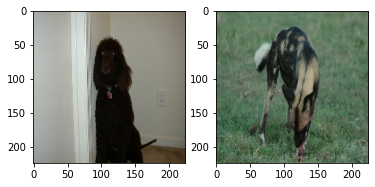

In [13]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ 2Í∞úÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

In [14]:
# Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ(a)Î•º Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄÎ°ú ÌïòÍ≥† Í±∞Í∏∞Ïóê ÏÇΩÏûÖÌï† Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ(b)Í∞Ä ÏûàÏùÑ Îïå 
# Ï≤´ Î≤àÏß∏ ÏòÅÏó≠Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Ïùò ÏúÑÏπòÎ•º Í≤∞Ï†ïÌïòÎäî Ìï®ÏàòÎ•º Î®ºÏ†Ä Íµ¨ÌòÑÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÏóê ÎåÄÌï¥ÏÑúÎèÑ Ïú†Ïó∞ÌïòÍ≤å ÎåÄÏùë Í∞ÄÎä•ÌïòÎèÑÎ°ù Íµ¨ÌòÑ
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    # tf.cast : ÌÖêÏÑúÎ•º ÏÉàÎ°úÏö¥ ÌòïÌÉúÎ°ú Ï∫êÏä§ÌåÖÌïòÎäîÎç∞ ÏÇ¨Ïö©
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    # tf.math.sqrt : Ï†úÍ≥±Í∑ºÏùÑ Í≥ÑÏÇ∞
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(12, shape=(), dtype=int32) tf.Tensor(176, shape=(), dtype=int32)
y :  tf.Tensor(76, shape=(), dtype=int32) tf.Tensor(224, shape=(), dtype=int32)


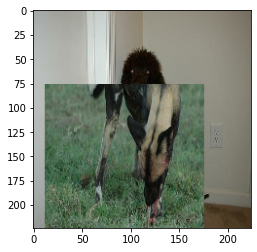

In [44]:
# Î∞îÌÉïÏù¥ÎØ∏ÏßÄ image_aÏóêÏÑú Î∞îÏö¥Îî© Î∞ïÏä§ Î∞îÍπ•Ï™Ω ÏòÅÏó≠ÏùÑ, 
# Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ image_bÏóêÏÑú Î∞îÏö¥Îî© Î∞ïÏä§ ÏïàÏ™Ω ÏòÅÏó≠ÏùÑ Í∞ÄÏ†∏ÏôÄÏÑú Ìï©ÏπòÎäî Ìï®Ïàò
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_bÏùò ÏôºÏ™Ω Î∞îÍπ• ÏòÅÏó≠
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_bÏùò ÏïàÏ™Ω ÏòÅÏó≠
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_bÏùò Ïò§Î•∏Ï™Ω Î∞îÍπ• ÏòÅÏó≠
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

###  3-2) ÎùºÎ≤® ÏÑûÍ∏∞

-------------------

Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÏóàÏúºÎãà ÎùºÎ≤®ÎèÑ Ïù¥Ïóê ÎßûÍ≤å ÏÑûÏñ¥Ï£ºÏñ¥Ïïº Í≤†Ï£†?      

* CutMixÏóêÏÑúÎäî Î©¥Ï†ÅÏóê ÎπÑÎ°ÄÌï¥ÏÑú ÎùºÎ≤®ÏùÑ ÏÑûÏñ¥Ï§çÎãàÎã§. 
* ÏÑûÏù∏ Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ ÎåÄÎπÑ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú Îëê Í∞ÄÏßÄ ÎùºÎ≤®Ïùò ÎπÑÏú®Î°ú ÎçîÌï¥Ï§çÎãàÎã§.     

      ex) A ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏßÑ ÏõêÎûò Ïù¥ÎØ∏ÏßÄ image_aÏôÄ B ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏßÑ Ïù¥ÎØ∏ÏßÄ image_bÎ•º ÏÑûÏùÑ Îïå image_aÎ•º 0.4ÎßåÌÅº ÏÑûÏóàÏùÑ Í≤ΩÏö∞, 0.4ÎßåÌÅºÏùò ÌÅ¥ÎûòÏä§ A, 0.6ÎßåÌÅºÏùò ÌÅ¥ÎûòÏä§ BÎ•º Í∞ÄÏßÄÎèÑÎ°ù Ìï¥Ï£ºÍ∏∞    
* ÎùºÎ≤®Î≤°ÌÑ∞ - ÌÅ¥ÎûòÏä§ 1Í∞úÎßå 1Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ïù¥ ÏïÑÎãàÎùº AÏôÄ B ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Ïóê Í∞ÅÍ∞Å 0.4, 0.6ÏùÑ Î∞∞Î∂ÑÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©!!      

In [45]:
# ÏÑûÏù∏ Ïù¥ÎØ∏ÏßÄ Îëê Í∞ÄÏßÄÏóê ÎåÄÌïòÏó¨ ÎùºÎ≤®ÏùÑ ÎßåÎì§ Îïå Ï†ÅÏ†àÌïú ÎπÑÏú®Î°ú ÎùºÎ≤®ÏùÑ Ìï©Ï≥êÏ£ºÎäî Ìï®Ïàò
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.51626

In [46]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

## 4. Mixup Augmentation

------------------------------------

MixupÏùÄ ÏïûÏóêÏÑú Î≥¥Ïó¨ÎìúÎ¶∞ CutMixÎ≥¥Îã§ Í∞ÑÎã®ÌïòÍ≤å Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏÑûÏñ¥Ï§çÎãàÎã§.     
Îëê Í∞ú Ïù¥ÎØ∏ÏßÄÏùò ÌîΩÏÖÄÎ≥Ñ Í∞íÏùÑ ÎπÑÏú®Ïóê Îî∞Îùº ÏÑûÏñ¥Ï£ºÎäî Î∞©ÏãùÏúºÎ°ú CutMixÎ≥¥Îã§ Íµ¨ÌòÑÏù¥ Í∞ÑÎã®ÌïòÎã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§.

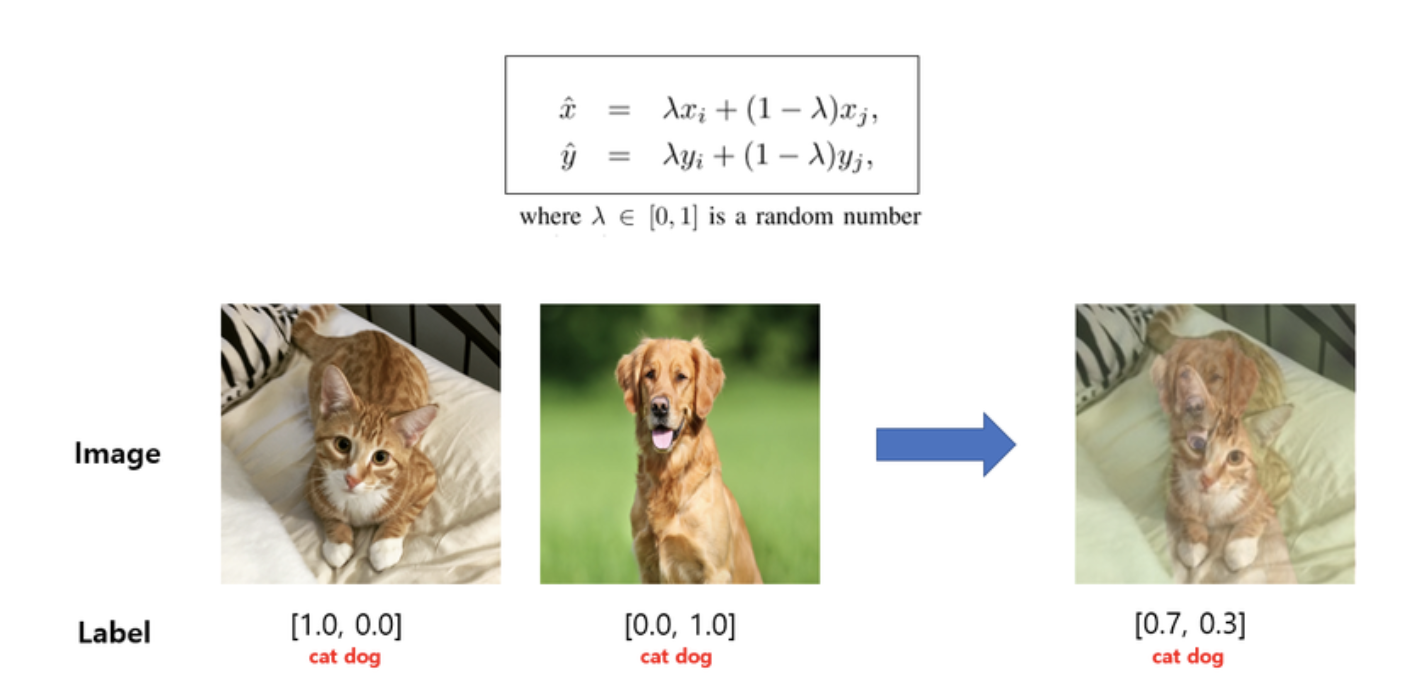

In [47]:
num_classes = ds_info.features["label"].num_classes
num_classes

120

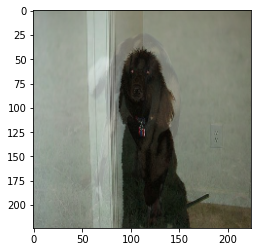

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.76545167 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [48]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

In [21]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

## 5.  Îç∞Ïù¥ÌÑ∞ÏÖã Ï†úÏûë

In [22]:
def onehot(image, label) :
    label = tf.one_hot(label, num_classes)
    return image, label

In [23]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

#Î∞∞Ïπò Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ïÎ†¨ ÌõÑ CutMixÏôÄ MixupÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÏàòÏ†ïÌïú Ìï®Ïàò
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False, with_cutmix=False, with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment
        )
    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [24]:
# augmentationÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_train_cutmix = apply_normalize_on_dataset(ds_train, with_cutmix=True)
ds_train_mixup = apply_normalize_on_dataset(ds_train, with_mixup=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test = True)

## 6. Î™®Îç∏ ÎßåÎì§Í∏∞

### 6-1) No Augmentation

In [25]:
# imagenet Îç∞Ïù¥ÌÑ∞Ïóê ÌõàÎ†®Îêú ResNet50 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
no_aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False, # ÎßàÏßÄÎßâ fully connected layer ÎØ∏Ìè¨Ìï®
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation = 'softmax')  # Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî FC layer Î∂ôÏó¨ÏÑú ÌôúÏö©
])

94773248/94765736 [==============================] - 1s 0us/step


### 6-2) Í∏∞Î≥∏ Augmentation

In [26]:
# AugmentationÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÏãúÌÇ¨ ResNet ÏÉùÏÑ±
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

### 6-3) Cutmix Augmentation

In [27]:
cutmix_aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

### 4) Mixup Augmentation

In [28]:
mixup_aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

## 7. Î™®Îç∏ÌõàÎ†®ÌïòÍ∏∞

--------------------------

cutmix(), mixup()ÏùÑ Íµ¨ÌòÑÌïòÎ©¥ÏÑú labelÏùò mix ÎïåÎ¨∏Ïóê ÎçîÏù¥ÏÉÅ labelÏù¥ Ïä§ÏπºÎùºÍ∞íÏùÑ Í∞ÄÏßÄÏßÄ Î™ªÌïòÍ≥† One-Hot Î≤°ÌÑ∞ ÌòïÌÉúÎ°ú Î≥ÄÌôòÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê    

sparse_categorical_crossentropy()ÎåÄÏã†Ïóê categorical_crossentropy()Î•º ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [29]:
EPOCH = 20
tf.random.set_seed(2705)

no_aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

cutmix_aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

mixup_aug_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

In [30]:
his_no_aug_resnet50 = no_aug_resnet50.fit(
    ds_train_no_aug, # augmentation Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 352s 433ms/step - loss: 3.1514 - accuracy: 0.2839 - val_loss: 3.4611 - val_accuracy: 0.1975
Epoch 2/20
750/750 [==============================] - 325s 434ms/step - loss: 0.9262 - accuracy: 0.7403 - val_loss: 1.0915 - val_accuracy: 0.6785
Epoch 3/20
750/750 [==============================] - 325s 433ms/step - loss: 0.2954 - accuracy: 0.9340 - val_loss: 0.9583 - val_accuracy: 0.7181
Epoch 4/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0780 - accuracy: 0.9910 - val_loss: 0.9055 - val_accuracy: 0.7428
Epoch 5/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0332 - accuracy: 0.9975 - val_loss: 0.9116 - val_accuracy: 0.7455
Epoch 6/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0170 - accuracy: 0.9997 - val_loss: 0.9474 - val_accuracy: 0.7399
Epoch 7/20
750/750 [==============================] - 325s 434ms/step - loss: 0.0292 - accuracy: 0.9977 - val_loss: 0.9888 -

In [32]:
his_aug_resnet50 = aug_resnet50.fit(
    ds_train_no_aug, 
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 326s 433ms/step - loss: 0.0378 - accuracy: 0.9981 - val_loss: 0.8976 - val_accuracy: 0.7407
Epoch 2/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0225 - accuracy: 0.9987 - val_loss: 0.9060 - val_accuracy: 0.7425
Epoch 3/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0139 - accuracy: 0.9997 - val_loss: 0.9437 - val_accuracy: 0.7406
Epoch 4/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.9292 - val_accuracy: 0.7428
Epoch 5/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0094 - accuracy: 0.9997 - val_loss: 0.9611 - val_accuracy: 0.7383
Epoch 6/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0075 - accuracy: 0.9998 - val_loss: 0.9522 - val_accuracy: 0.7409
Epoch 7/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.9770 -

In [33]:
his_cutmix_aug_resnet50 = cutmix_aug_resnet50.fit(
    ds_train_no_aug, 
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 331s 434ms/step - loss: 3.1582 - accuracy: 0.2816 - val_loss: 3.2184 - val_accuracy: 0.2320
Epoch 2/20
750/750 [==============================] - 325s 433ms/step - loss: 0.9520 - accuracy: 0.7343 - val_loss: 1.2348 - val_accuracy: 0.6468
Epoch 3/20
750/750 [==============================] - 325s 433ms/step - loss: 0.3778 - accuracy: 0.9085 - val_loss: 0.9829 - val_accuracy: 0.7112
Epoch 4/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0998 - accuracy: 0.9878 - val_loss: 0.9103 - val_accuracy: 0.7390
Epoch 5/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0308 - accuracy: 0.9988 - val_loss: 0.9157 - val_accuracy: 0.7393
Epoch 6/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0165 - accuracy: 0.9997 - val_loss: 0.9268 - val_accuracy: 0.7394
Epoch 7/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0123 - accuracy: 0.9996 - val_loss: 0.9452 -

In [34]:
his_mixup_aug_resnet50 = mixup_aug_resnet50.fit(
    ds_train_no_aug, 
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 330s 433ms/step - loss: 3.1829 - accuracy: 0.2823 - val_loss: 3.7491 - val_accuracy: 0.1679
Epoch 2/20
750/750 [==============================] - 325s 433ms/step - loss: 0.9328 - accuracy: 0.7390 - val_loss: 1.1944 - val_accuracy: 0.6552
Epoch 3/20
750/750 [==============================] - 325s 433ms/step - loss: 0.2844 - accuracy: 0.9348 - val_loss: 0.9764 - val_accuracy: 0.7160
Epoch 4/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0762 - accuracy: 0.9924 - val_loss: 0.9397 - val_accuracy: 0.7281
Epoch 5/20
750/750 [==============================] - 325s 434ms/step - loss: 0.0583 - accuracy: 0.9955 - val_loss: 0.9302 - val_accuracy: 0.7364
Epoch 6/20
750/750 [==============================] - 325s 434ms/step - loss: 0.0231 - accuracy: 0.9992 - val_loss: 0.9115 - val_accuracy: 0.7429
Epoch 7/20
750/750 [==============================] - 325s 433ms/step - loss: 0.0125 - accuracy: 0.9995 - val_loss: 0.9286 -

## 8. ÏãúÍ∞ÅÌôî ÌïòÍ∏∞

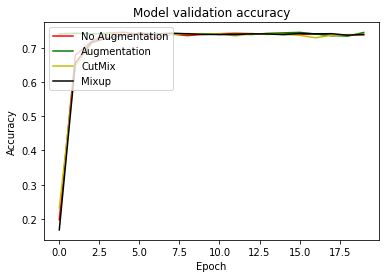

In [49]:
plt.plot(his_no_aug_resnet50.history['val_accuracy'], 'r')
plt.plot(his_aug_resnet50.history['val_accuracy'], 'g')
plt.plot(his_cutmix_aug_resnet50.history['val_accuracy'], 'y')
plt.plot(his_mixup_aug_resnet50.history['val_accuracy'], 'k')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Augmentation', 'CutMix', 'Mixup'], loc='upper left')
plt.show()

Ï°∞Í∏à Îçî ÌôïÎåÄÌï¥ÏÑú Î≥¥Í≤†ÏäµÎãàÎã§

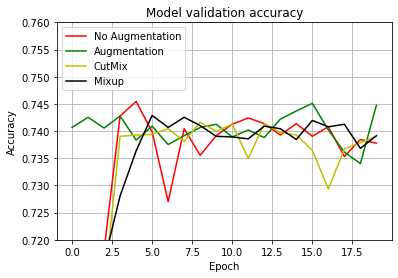

In [57]:
plt.plot(his_no_aug_resnet50.history['val_accuracy'], 'r')
plt.plot(his_aug_resnet50.history['val_accuracy'], 'g')
plt.plot(his_cutmix_aug_resnet50.history['val_accuracy'], 'y')
plt.plot(his_mixup_aug_resnet50.history['val_accuracy'], 'k')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Augmentation', 'CutMix', 'Mixup'], loc='upper left')
plt.grid(True)
plt.ylim(0.72, 0.76) 
plt.show()

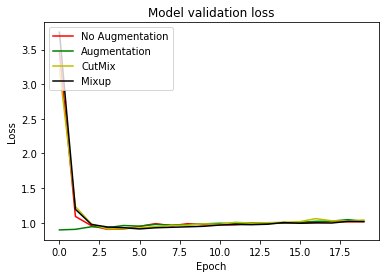

In [64]:
plt.plot(his_no_aug_resnet50.history['val_loss'], 'r')
plt.plot(his_aug_resnet50.history['val_loss'], 'g')
plt.plot(his_cutmix_aug_resnet50.history['val_loss'], 'y')
plt.plot(his_mixup_aug_resnet50.history['val_loss'], 'k')
plt.title('Model validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Augmentation', 'CutMix', 'Mixup'], loc='upper left')
plt.show()

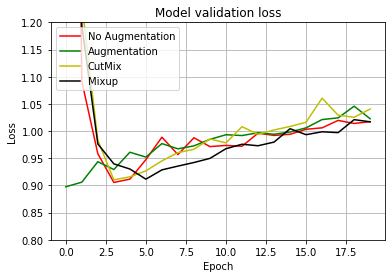

In [72]:
plt.plot(his_no_aug_resnet50.history['val_loss'], 'r')
plt.plot(his_aug_resnet50.history['val_loss'], 'g')
plt.plot(his_cutmix_aug_resnet50.history['val_loss'], 'y')
plt.plot(his_mixup_aug_resnet50.history['val_loss'], 'k')
plt.title('Model validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'Augmentation', 'CutMix', 'Mixup'], loc='upper left')
plt.grid(True)
plt.ylim(0.8, 1.2) 
plt.show()

## 9. AugmentationÏóê ÏùòÌïú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

In [39]:
import pandas as pd

In [40]:
acc_data = {'No Augmentation': his_no_aug_resnet50.history['val_accuracy'], 
            'Augmentation': his_aug_resnet50.history['val_accuracy'], 
            'CutMix': his_cutmix_aug_resnet50.history['val_accuracy'], 
            'Mixup': his_mixup_aug_resnet50.history['val_accuracy']}
acc_df = pd.DataFrame(acc_data)
acc_df

No Augmentation  Augmentation    CutMix     Mixup
0          0.197528      0.740672  0.232043  0.167910
1          0.678521      0.742537  0.646805  0.655201
2          0.718050      0.740555  0.711171  0.715952
3          0.742770      0.742770  0.739039  0.728078
4          0.745452      0.738340  0.739272  0.736357
5          0.739855      0.740905  0.739389  0.742887
6          0.727029      0.737523  0.740438  0.740672
7          0.740438      0.739156  0.738106  0.742537
8          0.735541      0.740672  0.741605  0.741021
9          0.739156      0.741255  0.739972  0.739039
10         0.741255      0.738923  0.741255  0.738923
11         0.742421      0.740205  0.734958  0.738573
12         0.741371      0.738806  0.741371  0.740905
13         0.739272      0.742188  0.739739  0.740438
14         0.741371      0.743703  0.739272  0.738456
15         0.739039      0.745103  0.736474  0.741954
16         0.740788      0.740205  0.729361  0.740788
17         0.735308      0.736124  0.736707  0.741255
18         0.738456      0.734025  0.737873  0.736824
19         0.737757      0.744753  0.739039  0.739156

In [42]:
acc_df.describe()

No Augmentation  Augmentation     CutMix      Mixup
count        20.000000     20.000000  20.000000  20.000000
mean          0.708069      0.740421   0.707195   0.705346
std           0.121051      0.002756   0.113831   0.127987
min           0.197528      0.734025   0.232043   0.167910
25%           0.735483      0.738893   0.736095   0.736707
50%           0.739214      0.740613   0.739039   0.739097
75%           0.741284      0.742275   0.739797   0.740934
max           0.745452      0.745103   0.741605   0.742887

|ÎπÑÍµê|ÎÇ¥Ïö©|
|:--------------------|:---------|
|Augmentation vs CutMix	vs Mixup| ÏóÑÏ≤≠ ÌÅ∞ Ï∞®Ïù¥Îäî ÏïÑÎãàÏßÄÎßå CutMix, MixupÎ≥¥Îã§ AugmentationÏ†ÅÏö©Î™®Îç∏Ïù¥ accuracyÎÇò Îã§Î•∏ ÏÑ±Îä•Ïù¥ Ï¢ãÍ≤å ÎÇòÏôîÏäµÎãàÎã§.   CutMix, MixupÏùÑ Ï†ÅÏö©ÌñàÏùÑ Îïå ÏÑ±Îä•Ïù¥ Ï∞®Ïù¥Í∞Ä ÎÇòÍ≤å Ï¢ãÍ≤å ÎÇòÏò§ÏßÄ ÏïäÏïòÏäµÎãàÎã§.|
|No Augmentation vs Augmentation| ÎëòÎã§ ÎπÑÏä∑Ìïú accuracyÎ•º Í∞ÄÏßÄÏßÄÎßå AugmentationÏù¥ Ï°∞Í∏à Îçî ÎÜíÍ≤å ÎÇòÏôîÏäµÎãàÎã§.|      


# üåü Î£®Î∏åÎ¶≠

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
|:----------|:-------------|
|1. CutMixÏôÄ MixUp Í∏∞Î≤ïÏùÑ ResNet50 Î∂ÑÎ•òÍ∏∞Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÏòÄÎäîÍ∞Ä?|CutMixÏôÄ MixUpÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌõàÎ†®Ìïú Í∞ÅÍ∞ÅÏùò ResNet Î™®Îç∏Ïù¥ ÏàòÎ†¥ÌïòÏòÄÎã§.|
|2. Îã§ÏñëÌïú Ïã§ÌóòÏùÑ ÌÜµÌï¥ ÌÉúÏä§ÌÅ¨Ïóê ÏµúÏ†ÅÏù∏ Augmentation Í∏∞Î≤ïÏùÑ Ï∞æÏïÑÎÇ¥ÏóàÎäîÍ∞Ä?|Augmentation Ï†ÅÏö©ÏùÑ ÌÜµÌï¥ Augmentaion ÎØ∏Ï†ÅÏö©Ïãú ÎåÄÎπÑ 5% Ïù¥ÏÉÅÏùò ÏÑ±Îä•Ìñ•ÏÉÅÏùÑ ÌôïÏù∏Ìï®|
|3. Ïó¨Îü¨Í∞ÄÏßÄ Augmentation Í∏∞Î≤ïÏùÑ Ï†ÅÏö©Ìïú Í≤∞Í≥ºÎ•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÎπÑÍµêÎ∂ÑÏÑùÌïòÏòÄÎäîÍ∞Ä?|Í∏∞Î≥∏ Augmentation, CutMix, MixUpÏù¥ Ï†ÅÏö©Îêú Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÏôÄ Ìï®Íªò Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÏòÄÎã§.|